<h1> Building a Logistic Regression Model </h1>

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, plot_confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("cleaned_data.csv", index_col=0)

In [3]:
df.head()

,CRASH DATE,CRASH TIME,BOROUGH,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED
1603651,08/26/2013,20:40,BROOKLYN,40.629987,-73.971568,1.0,0.0,0,0,1,0,0,0
1055943,03/24/2016,12:02,MANHATTAN,40.751827,-73.984770,0.0,0.0,0,0,0,0,0,0
1777275,10/31/2012,21:45,MANHATTAN,40.793552,-73.945325,0.0,0.0,0,0,0,0,0,0
1251336,05/25/2015,4:30,QUEENS,40.692648,-73.833018,0.0,0.0,0,0,0,0,0,0
1057011,03/27/2016,14:25,BROOKLYN,40.681213,-73.847272,0.0,0.0,0,0,0,0,0,0


In [4]:
df.shape

(34521, 13)

In [5]:
df.columns

Index(['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'LATITUDE', 'LONGITUDE',
       'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED',
       'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED',
       'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED',
       'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED'],
      dtype='object')

In [6]:
df.isnull().sum()

CRASH DATE                       0
CRASH TIME                       0
BOROUGH                          0
LATITUDE                         0
LONGITUDE                        0
NUMBER OF PERSONS INJURED        0
NUMBER OF PERSONS KILLED         0
NUMBER OF PEDESTRIANS INJURED    0
NUMBER OF PEDESTRIANS KILLED     0
NUMBER OF CYCLIST INJURED        0
NUMBER OF CYCLIST KILLED         0
NUMBER OF MOTORIST INJURED       0
NUMBER OF MOTORIST KILLED        0
dtype: int64

In [7]:
#Adding a new column for years
df["CRASH DATE"] = pd.to_datetime(df["CRASH DATE"])
df["year"] = df["CRASH DATE"].dt.year
df["year"].unique()

array([2013, 2016, 2012, 2015, 2014, 2018, 2019, 2020, 2017, 2021],
      dtype=int64)

In [8]:
#Adding a month column for months
df["month"] = df["CRASH DATE"].dt.month
df["month"].unique()

array([ 8,  3, 10,  5,  7, 12,  9,  4, 11,  1,  6,  2], dtype=int64)

In [9]:
# Setting our training and target variables
X = df.drop(["CRASH DATE", "CRASH TIME", "BOROUGH", "year", "month"], axis=1)
y = df["BOROUGH"]

In [10]:
#Splitting our dataset for training and testing

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [11]:
#Model instantiation
logreg = LogisticRegression()

In [12]:
#Model fitting
logreg.fit(X_train, y_train)

LogisticRegression()

In [13]:
#Model Prediction
pred = logreg.predict(X_test)

In [15]:
#Checking our model accuracy
print(accuracy_score(y_test, pred))

0.5709651257096513


### Confusion Matrix

In [18]:
cm = confusion_matrix(y_test, pred)
print(cm)

[[ 240    2  101  897    0]
 [   0 2586  141   77    0]
 [   1  664  173 1112    0]
 [   0  157  156 1929    0]
 [   0  385    1    9    0]]


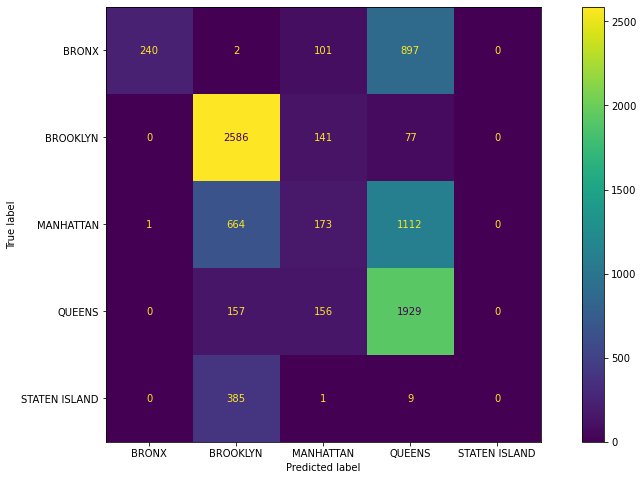

In [21]:
fig, ax = plt.subplots(figsize=(15,8))
plot_confusion_matrix(logreg, X_test, y_test, ax=ax)
plt.grid(False)